<div style="border: 2px solid #656565; border-radius: 5px; padding: 2rem 3rem;">
    <h1 style="margin: 0; color: #343d52">Model Building</h1>
</div>

## Feature Selection and Multicollinearity

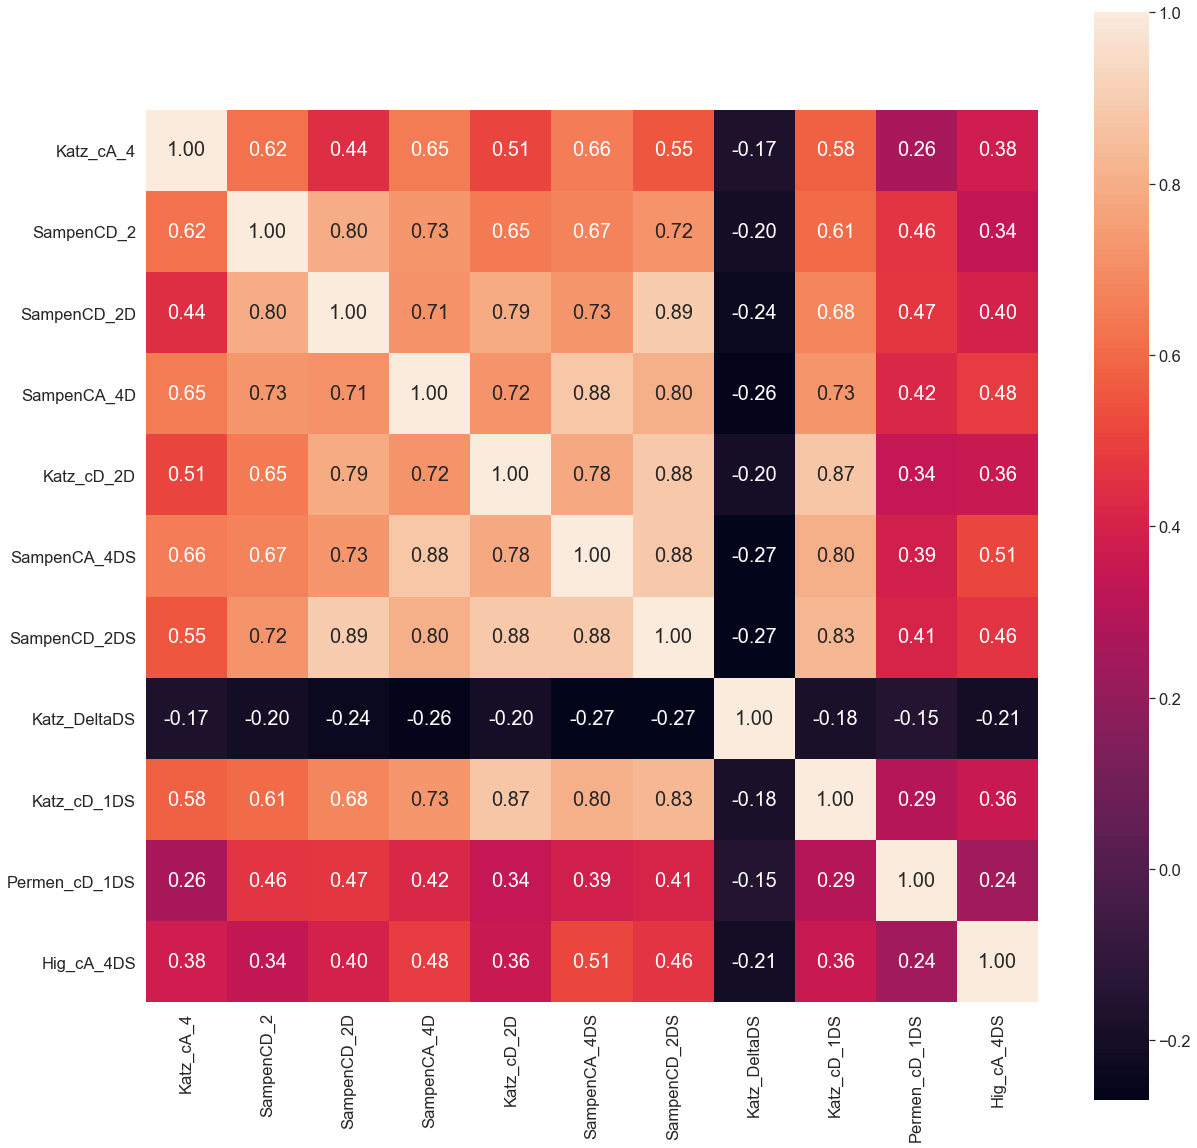

In [10]:
# Selected features
cols = ['Katz_cA_4', 'SampenCD_2', 'SampenCD_2D', 'SampenCA_4D', 'Katz_cD_2D', 'SampenCA_4DS', 'SampenCD_2DS', 'Katz_DeltaDS', 'Katz_cD_1DS', 'Permen_cD_1DS', 'Hig_cA_4DS']

# Checking for multicollinearity
correlation_matrix(eeg_df[cols])

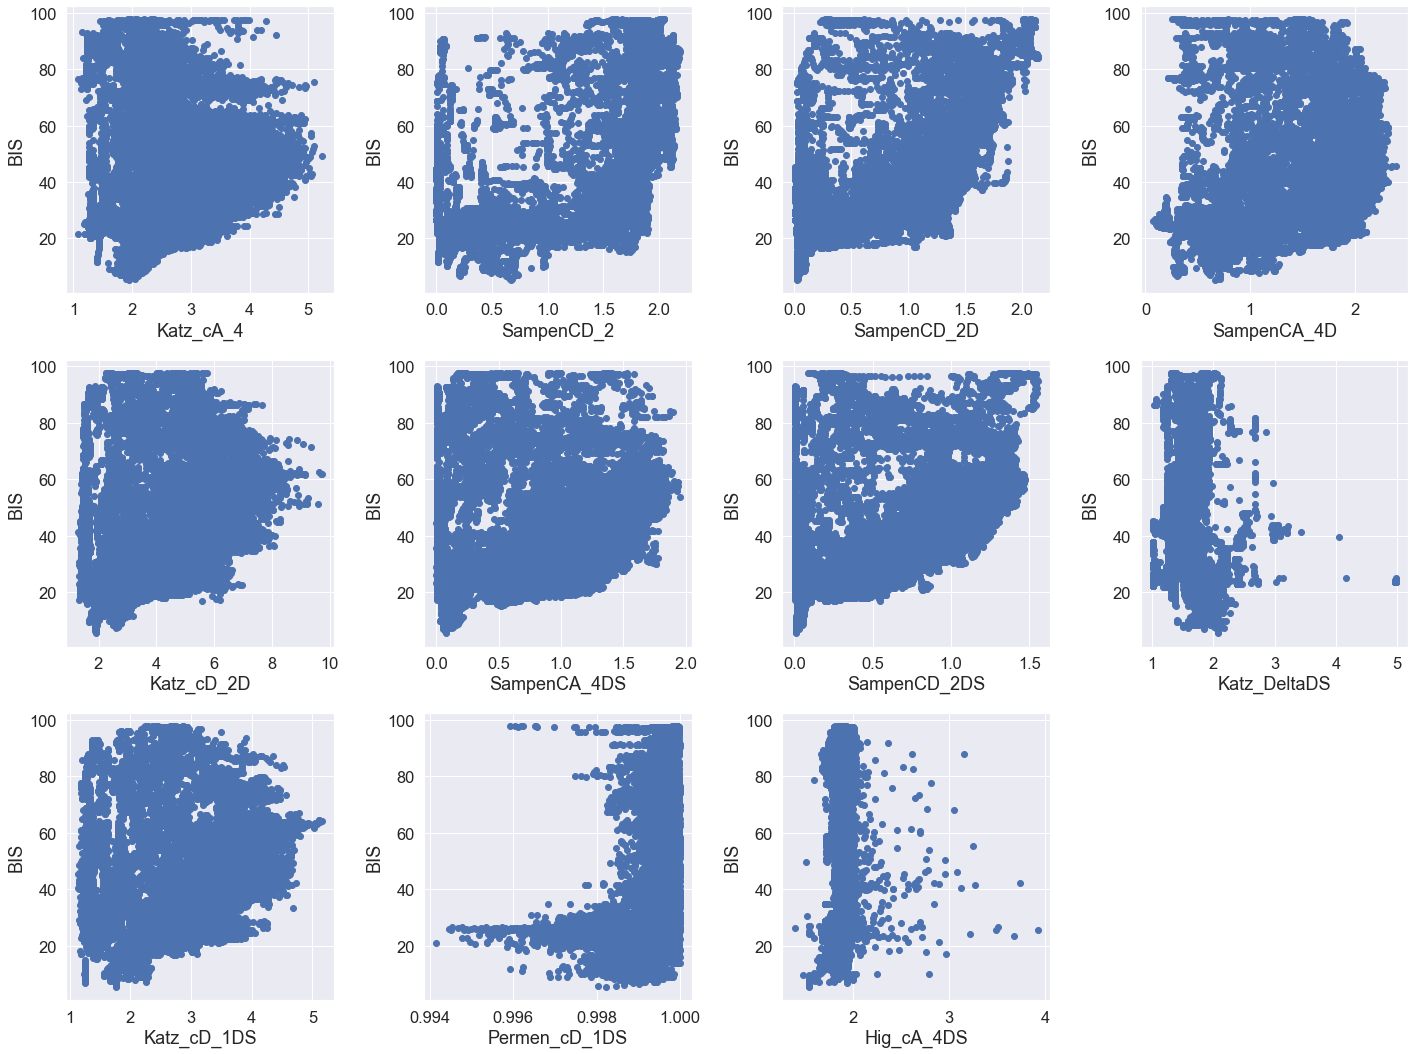

In [12]:
# Check the relationship between the selected features and the BIS
fig, ax = plt.subplots(3, 4, figsize=(20, 15))

ax[2, 3].axis('off')

for idx, feature in enumerate(cols[:4]):
    ax[0, idx].scatter(eeg_df[feature], eeg_df['BIS'])
    ax[0, idx].set_ylabel('BIS')
    ax[0, idx].set_xlabel(feature)
    
for idx, feature in enumerate(cols[4:8]):
    ax[1, idx].scatter(eeg_df[feature], eeg_df['BIS'])
    ax[1, idx].set_ylabel('BIS')
    ax[1, idx].set_xlabel(feature)
    
for idx, feature in enumerate(cols[8:]):
    ax[2, idx].scatter(eeg_df[feature], eeg_df['BIS'])
    ax[2, idx].set_ylabel('BIS')
    ax[2, idx].set_xlabel(feature)
    
    
plt.tight_layout()
plt.show()

<br/>

## Model 1: Linear Regression

MSE train: 144.060


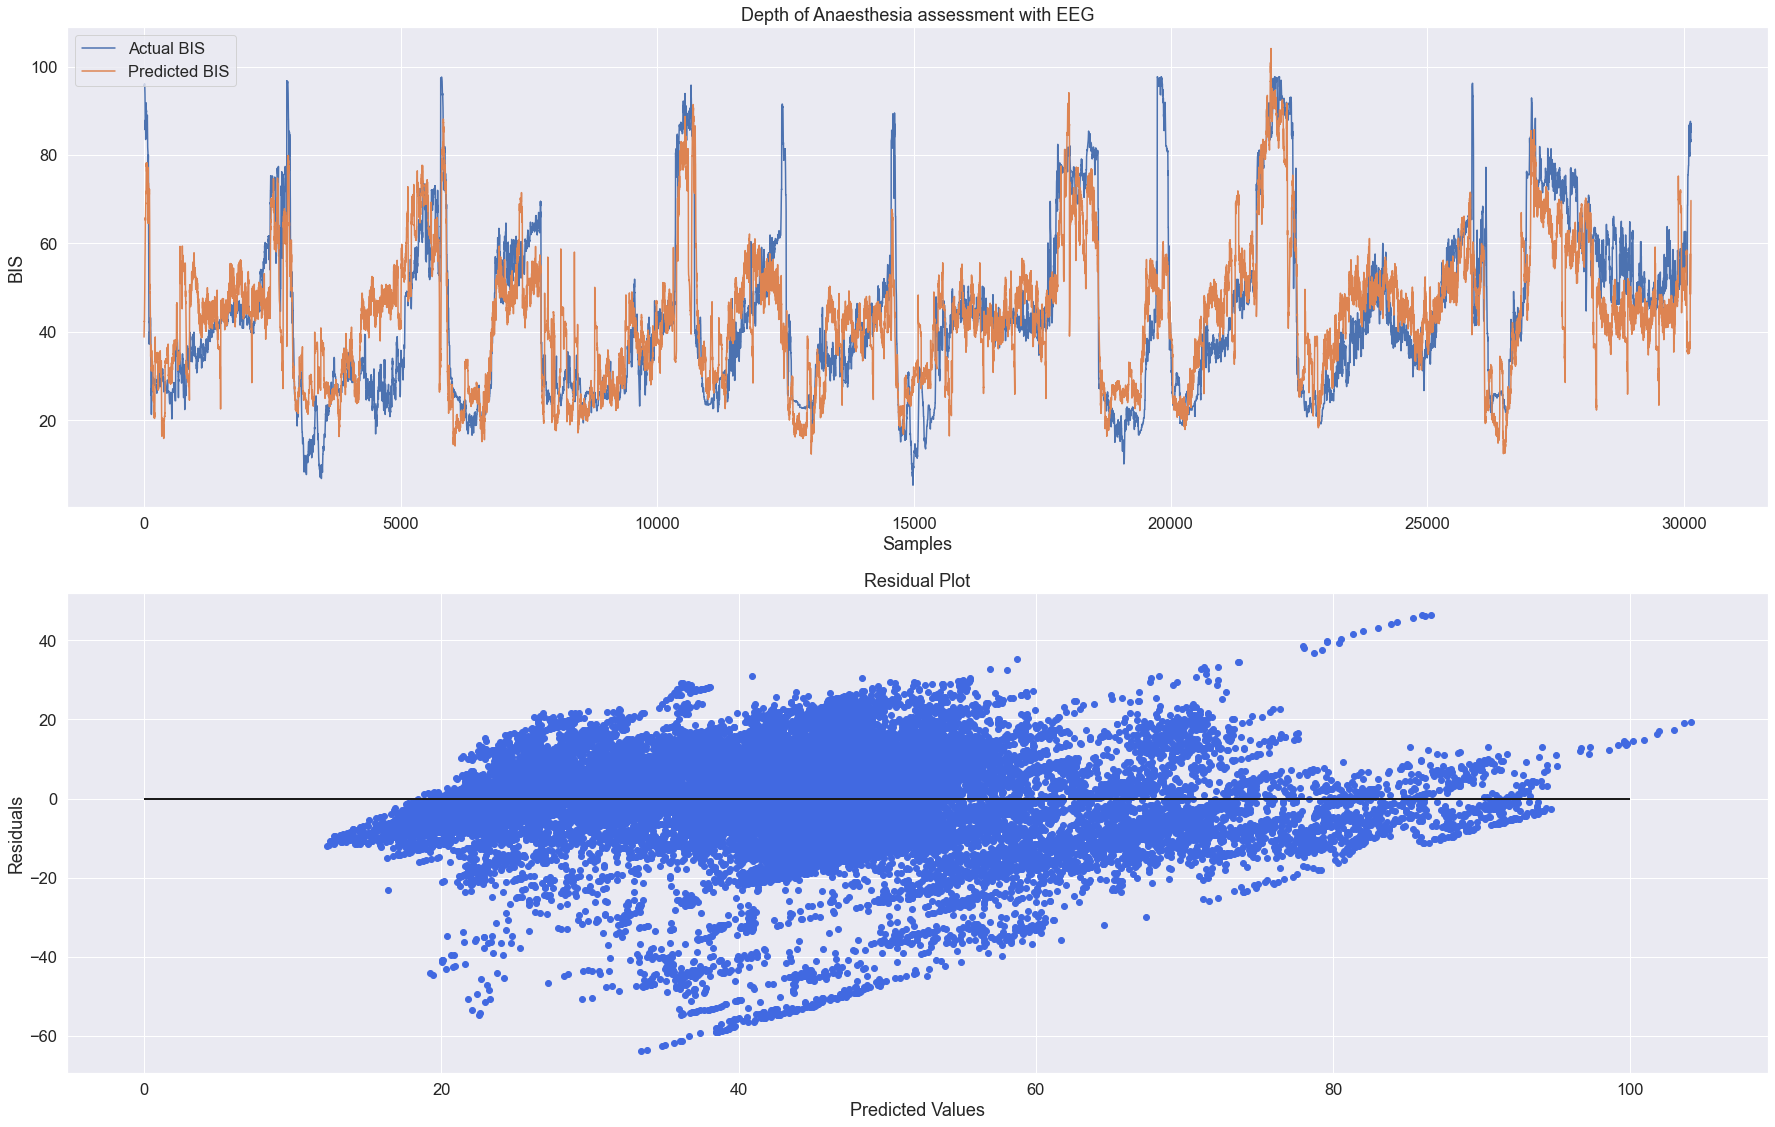

In [114]:
build_model(eeg_df, selected_features, scale=False)

<br/>

## Model 2: Decision Tree Regression

MSE train: 52.421


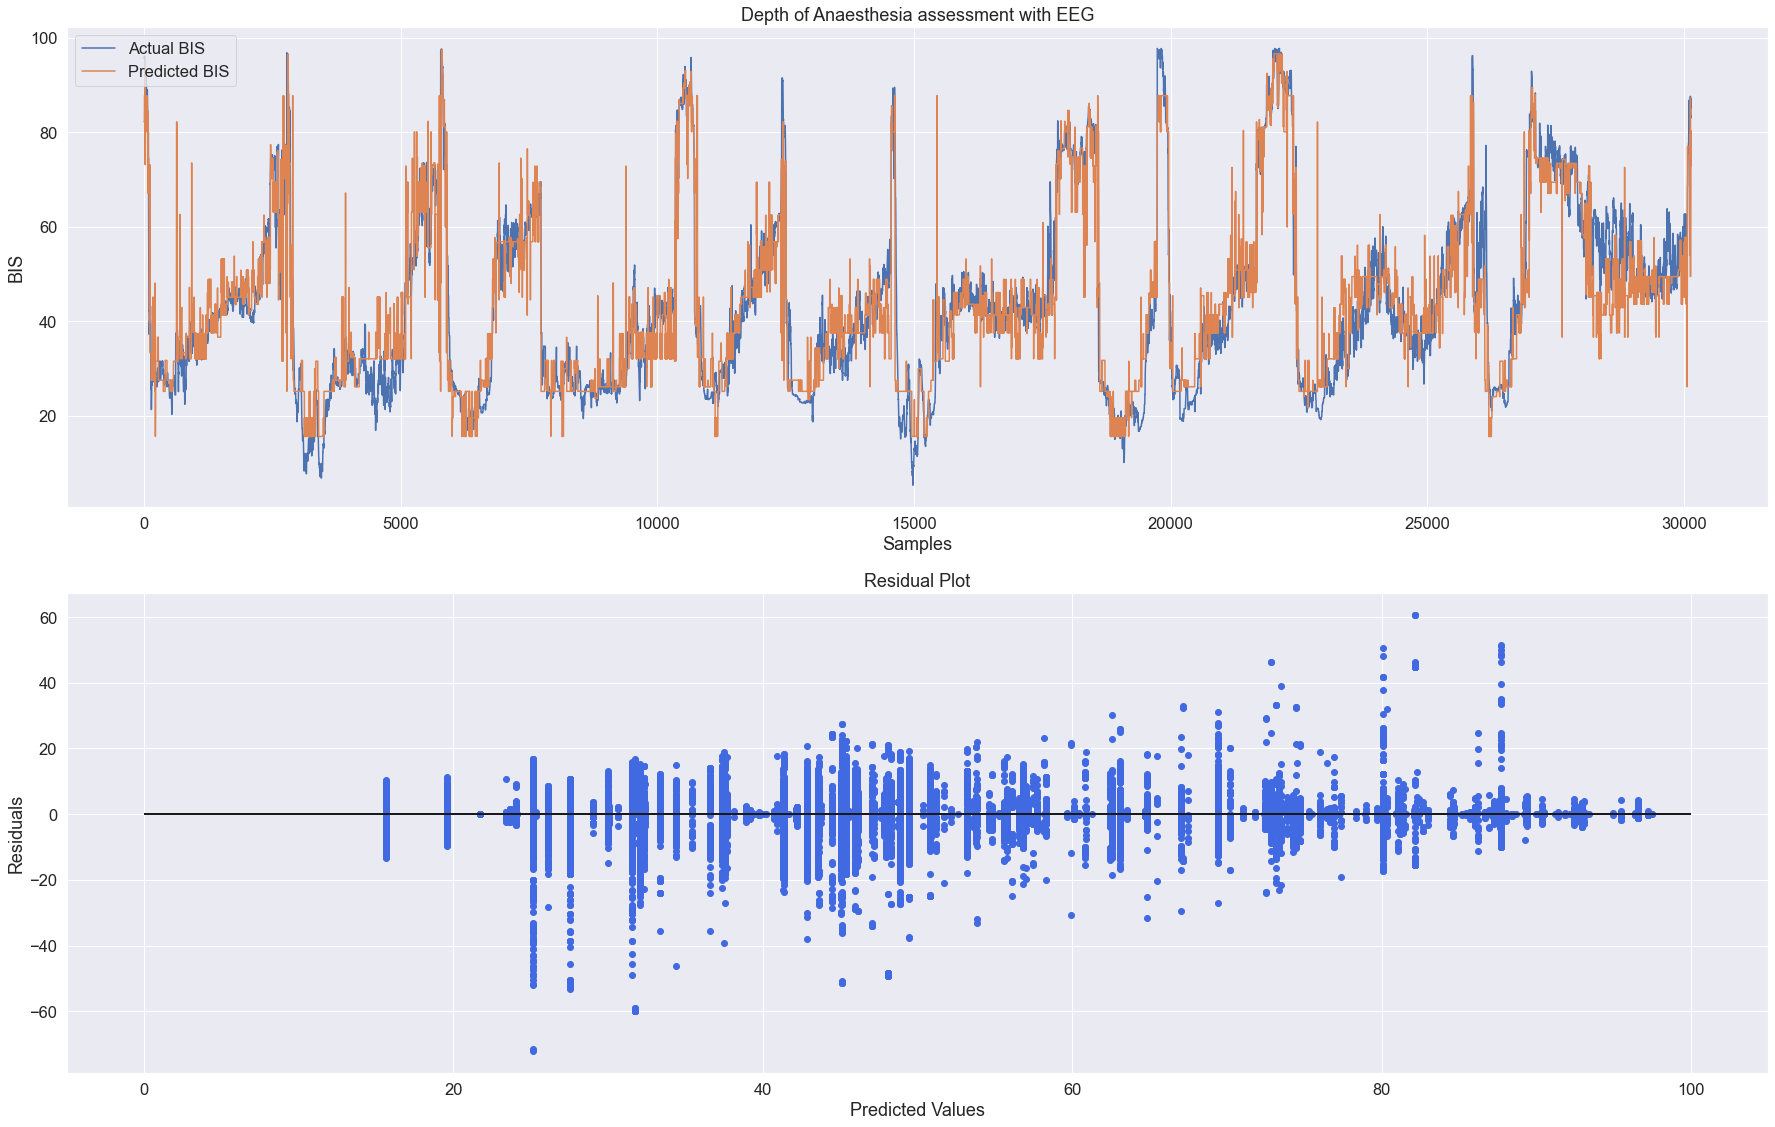

Feature Importances:  [0.01510192 0.56441867 0.05378382 0.02975535 0.16445229 0.1028897
 0.02583296 0.03606424 0.00153068 0.00617038]


In [115]:
build_model(eeg_df, selected_features, model='tree', scale=False)

<br/>

## Predicting the depth of anaesthesia for each patient

## <code>DecisionTreeRegressor</code>

Patient: 31_EEG200909092.mat



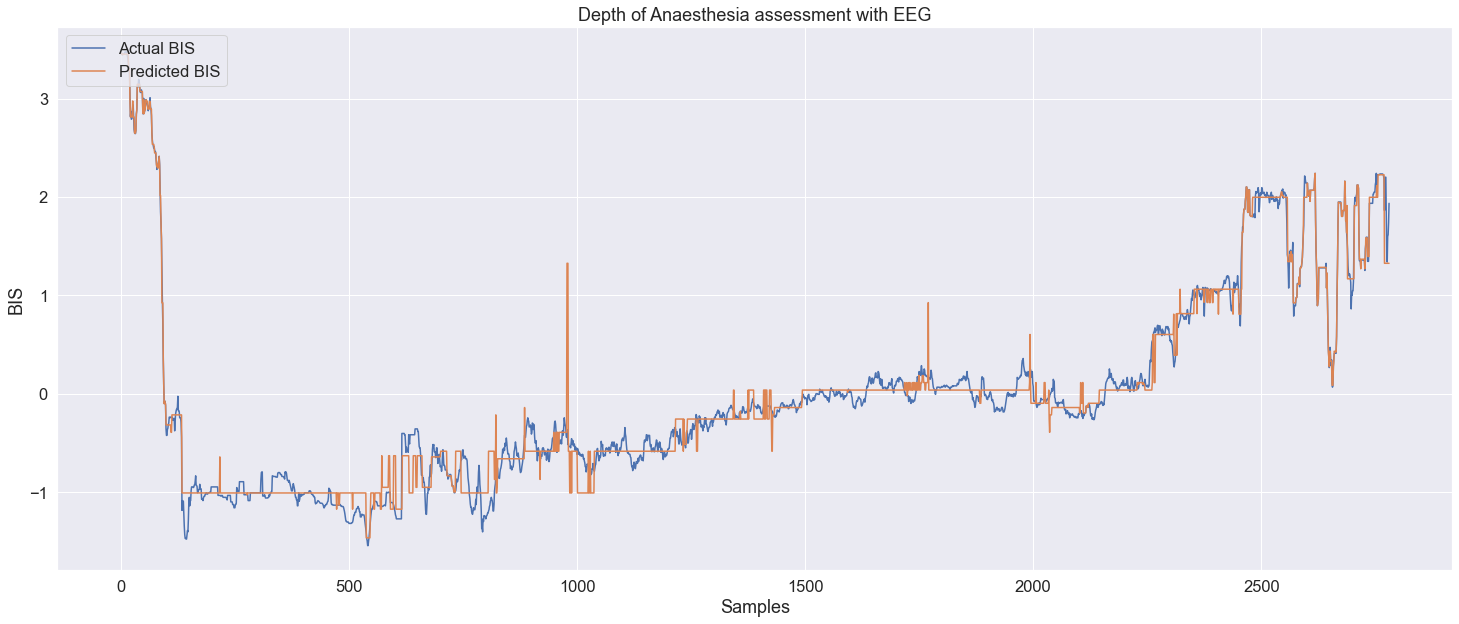

Patient: 14_EEG200906220903.mat



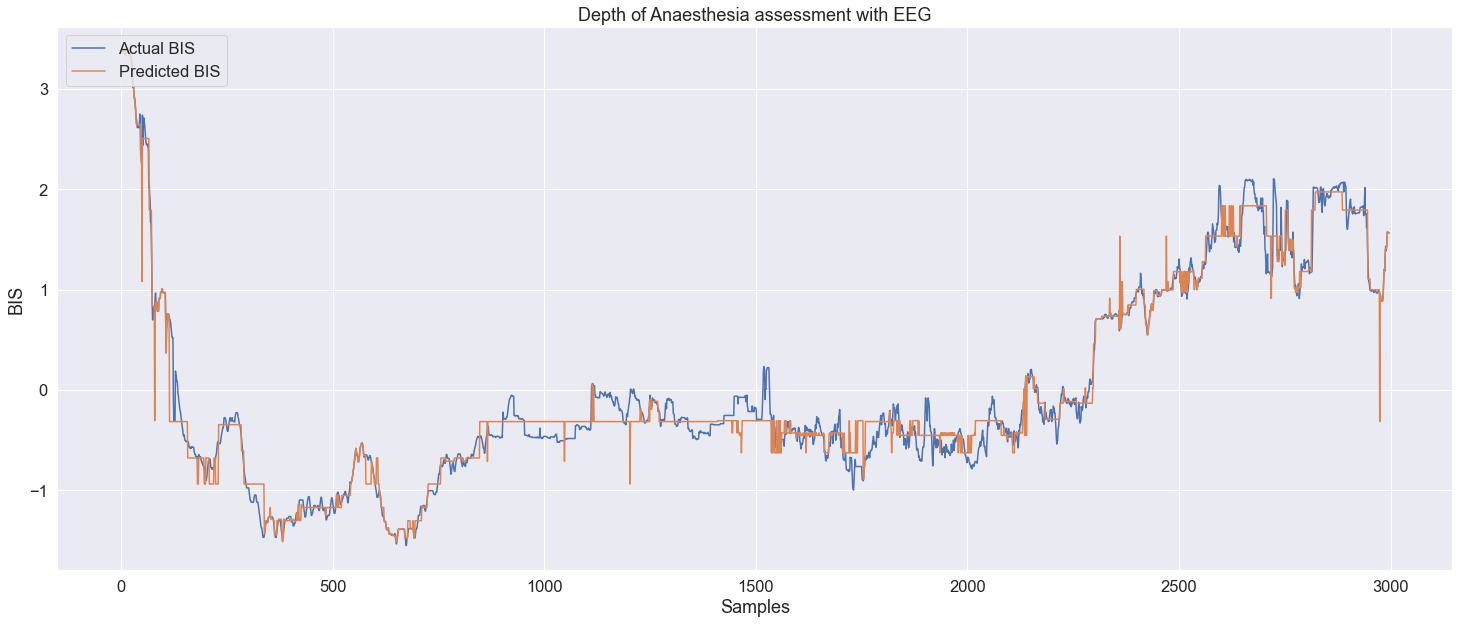

Patient: 4_EEG200909160908.mat



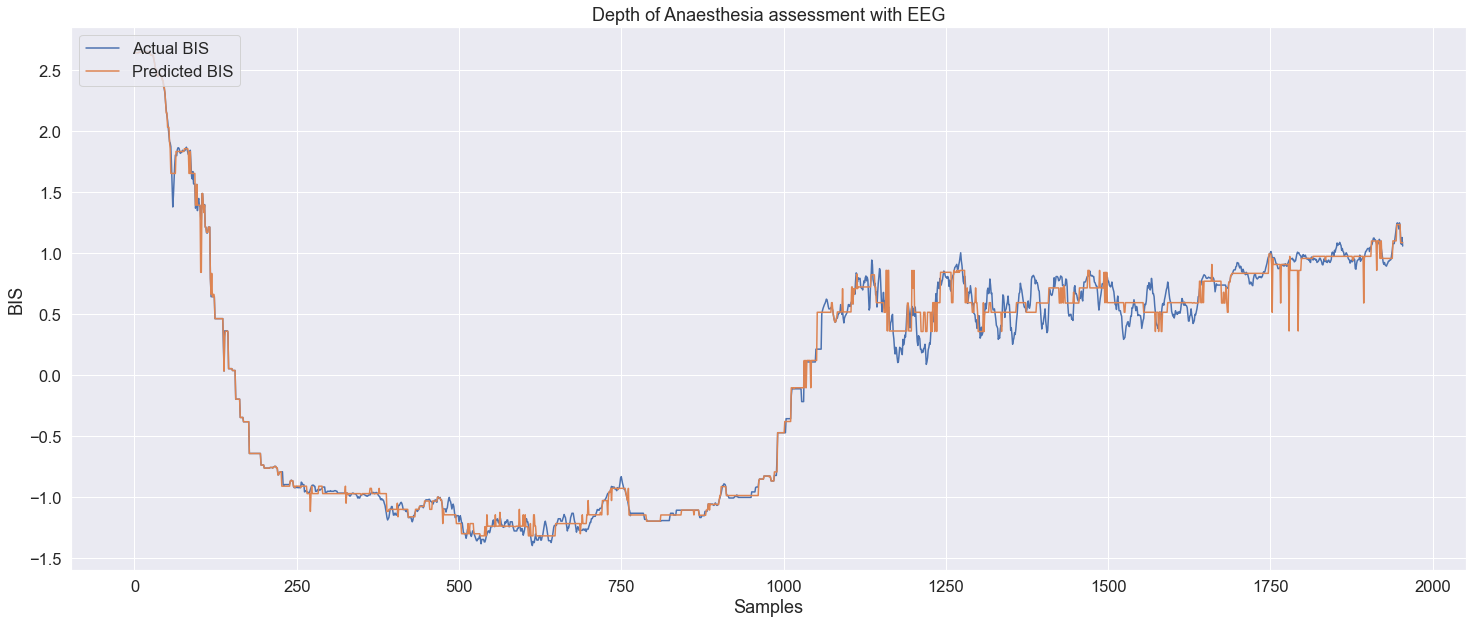

Patient: 13_EEG20100609.mat



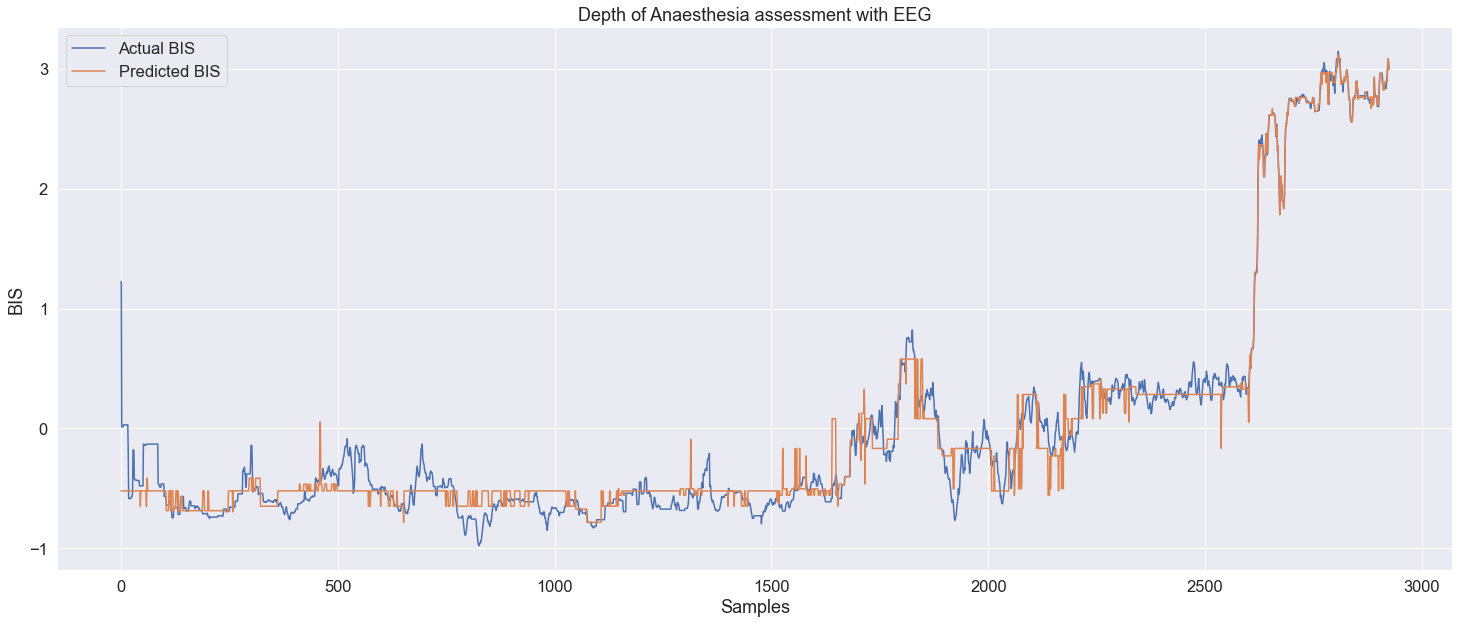

Patient: 19_EEG201004072.mat



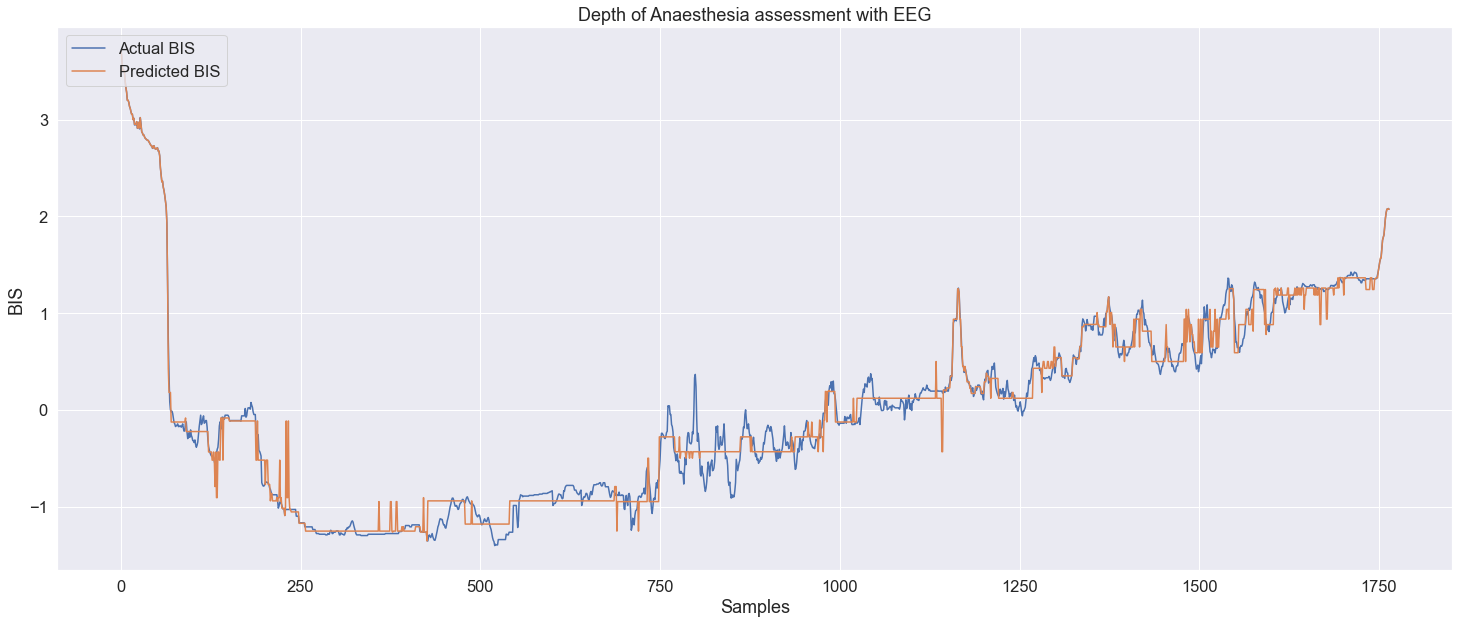

Patient: 30_EEG200909091.mat



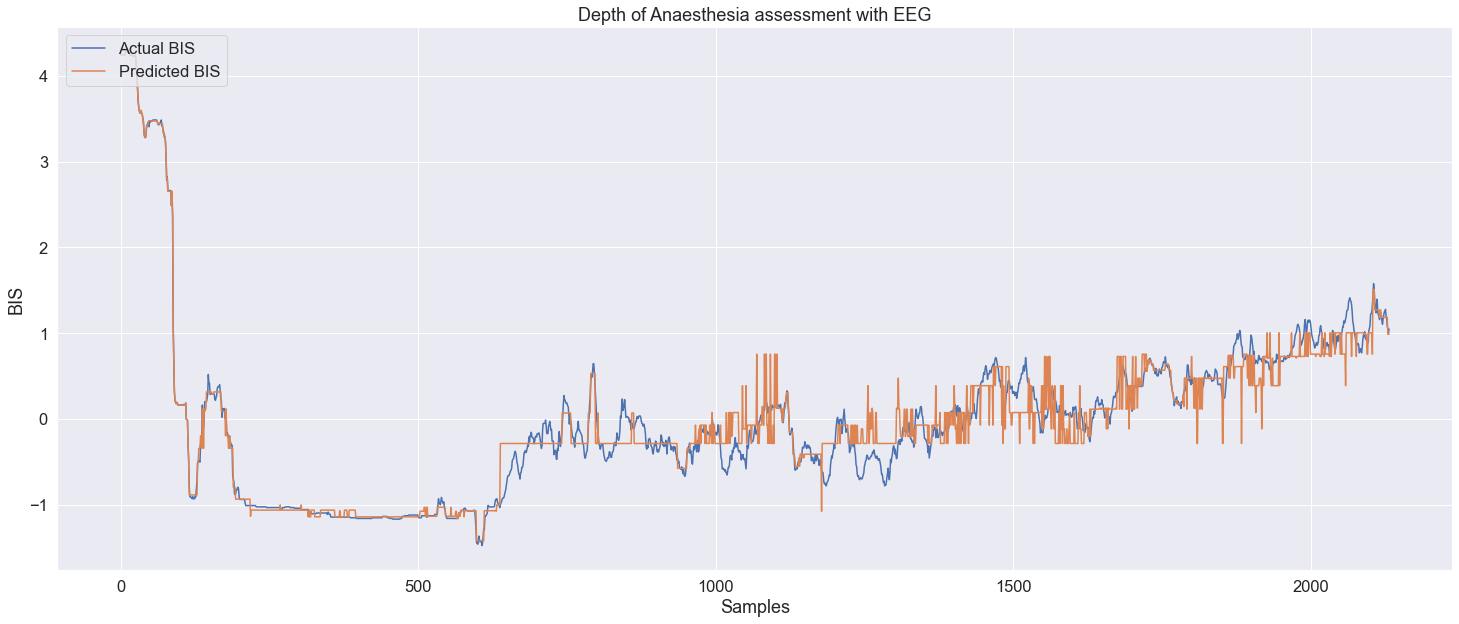

Patient: 2_EEG200908190811.mat



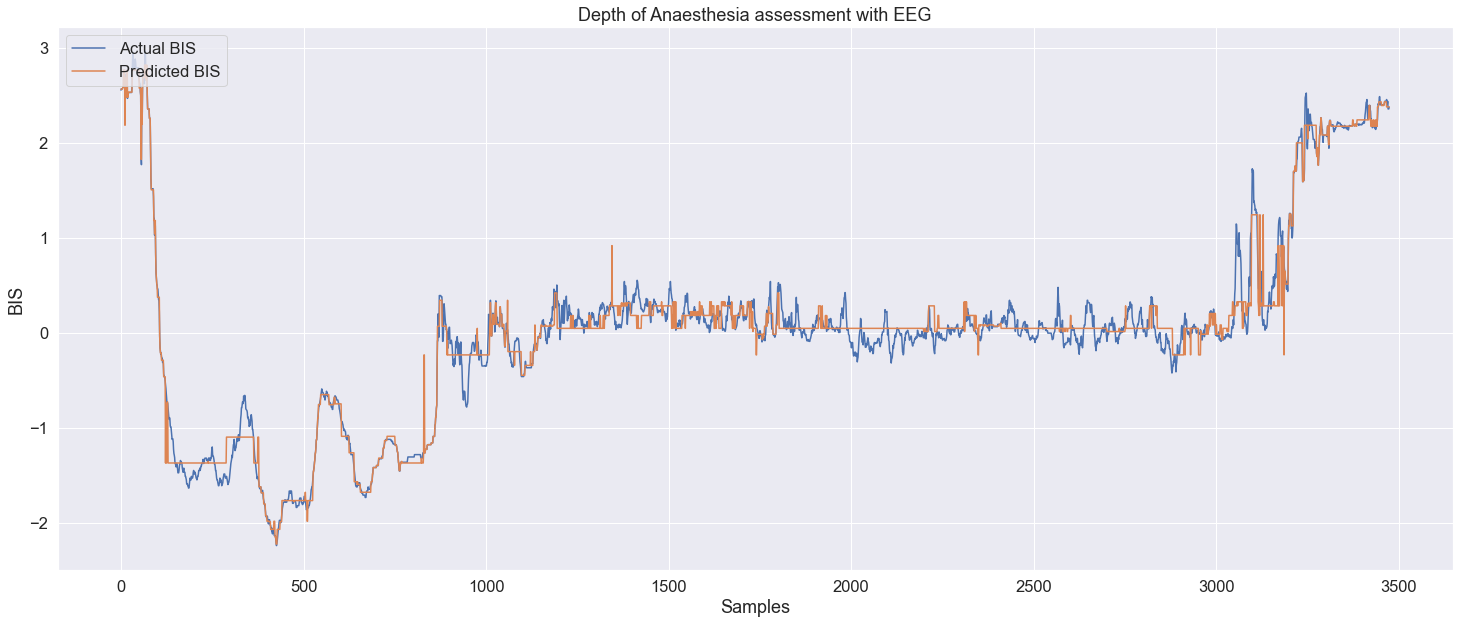

Patient: 32_EEG201004071.mat



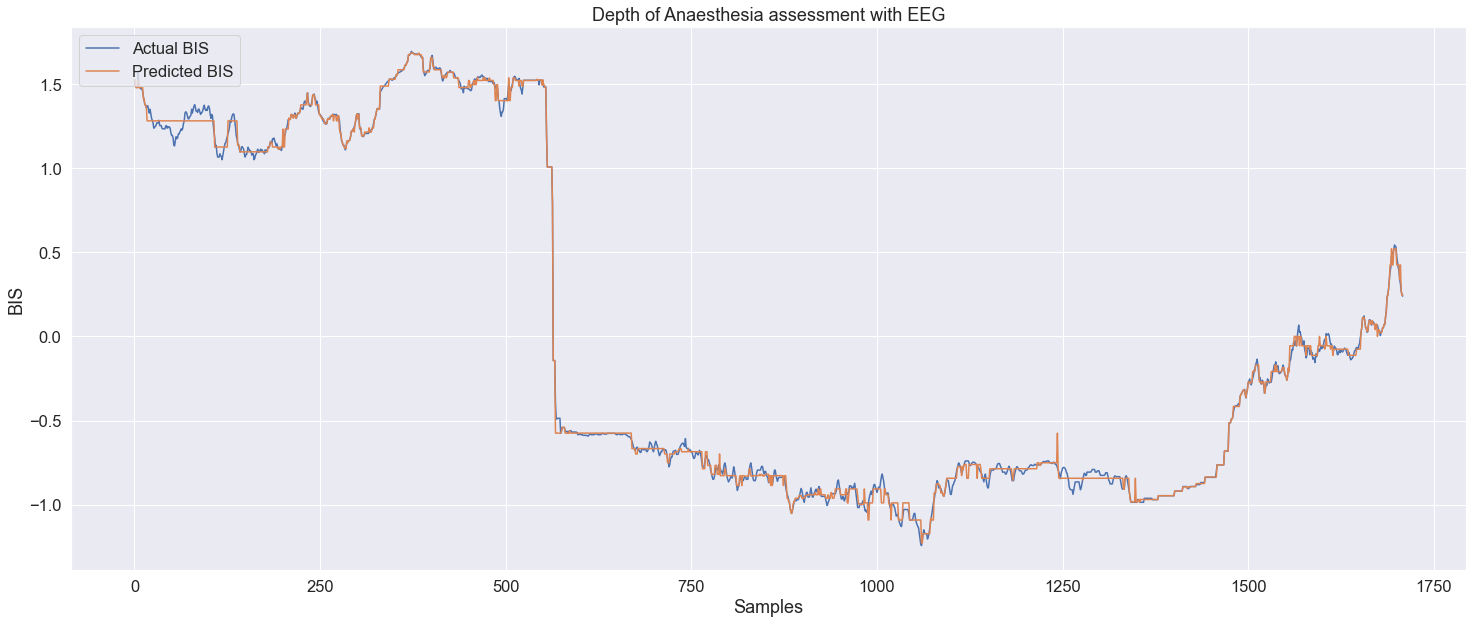

Patient: 20_EEG201005241.mat



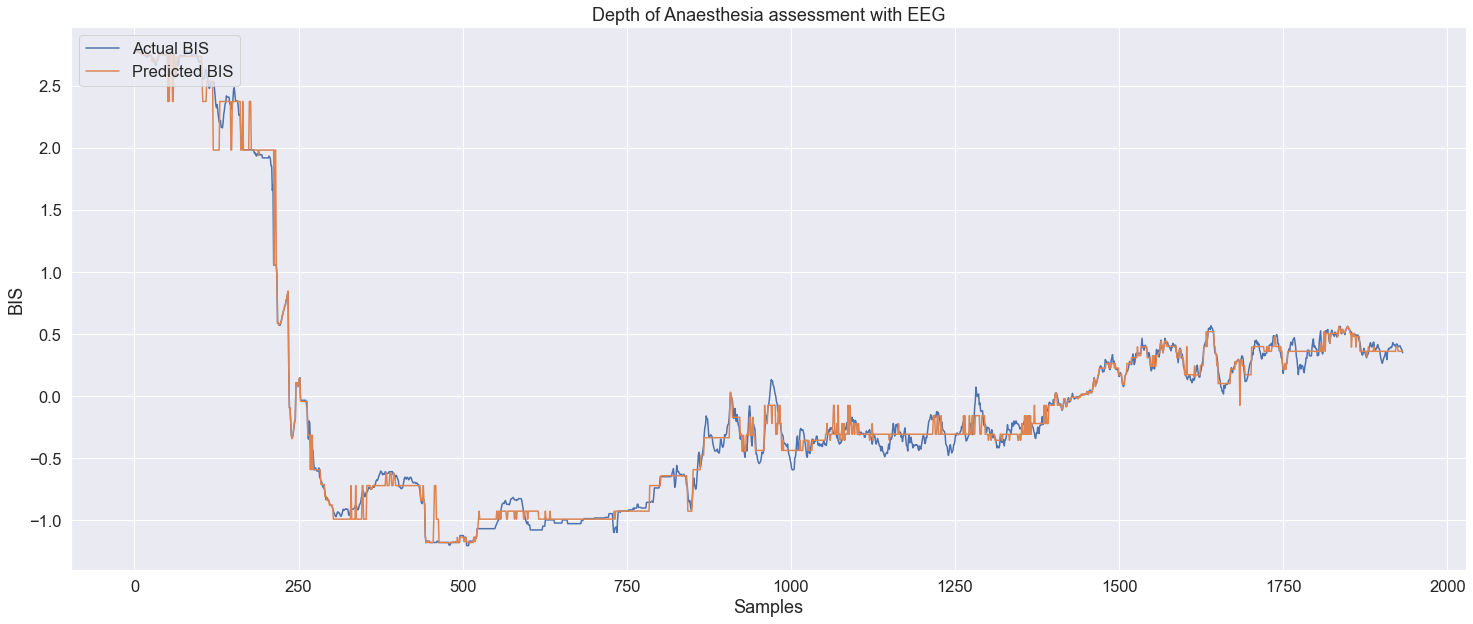

Patient: 7_EEG201005241657.mat



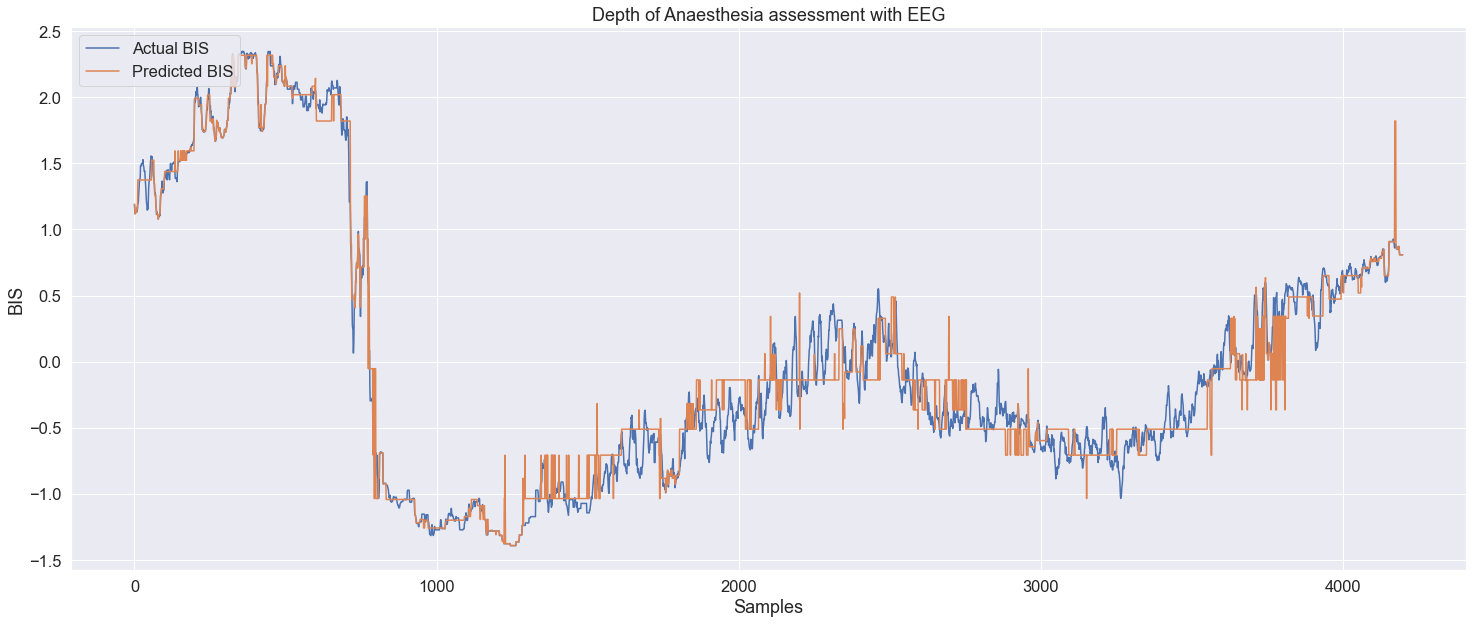

Patient: 3_EEG200908190921.mat



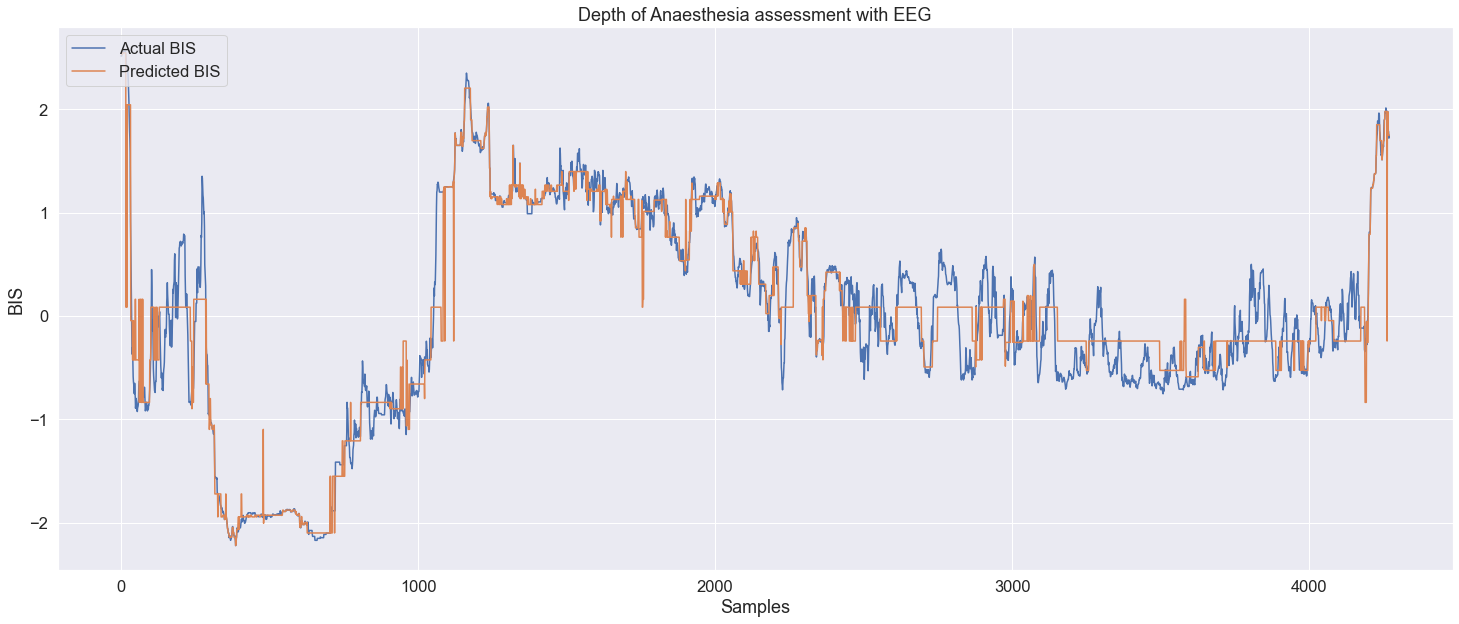

In [63]:
for train in training_set:
    patient = create_patient_data(train)
    print("Patient: {}".format(train.strip("_modified.csv")))
    print()
    build_model(patient, selected_features, model='tree')

<br/>

## <code>LinearRegression</code>

Patient: 31_EEG200909092.mat



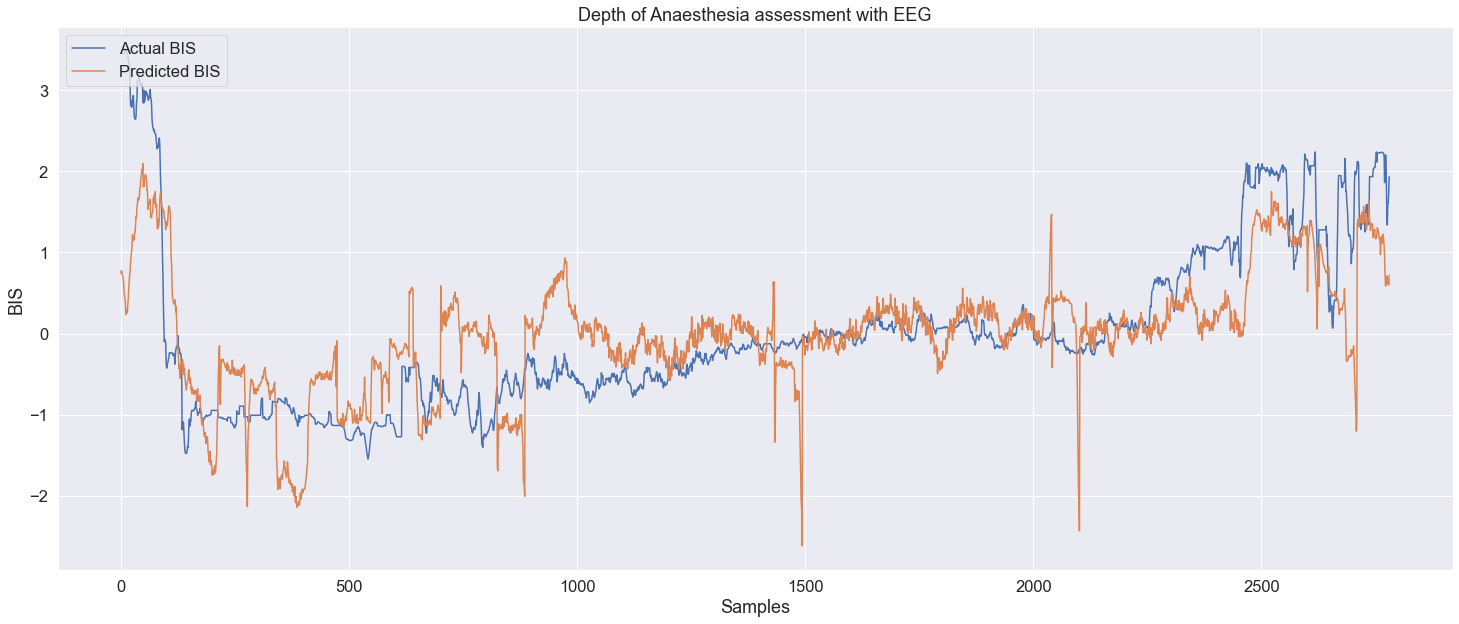

Patient: 14_EEG200906220903.mat



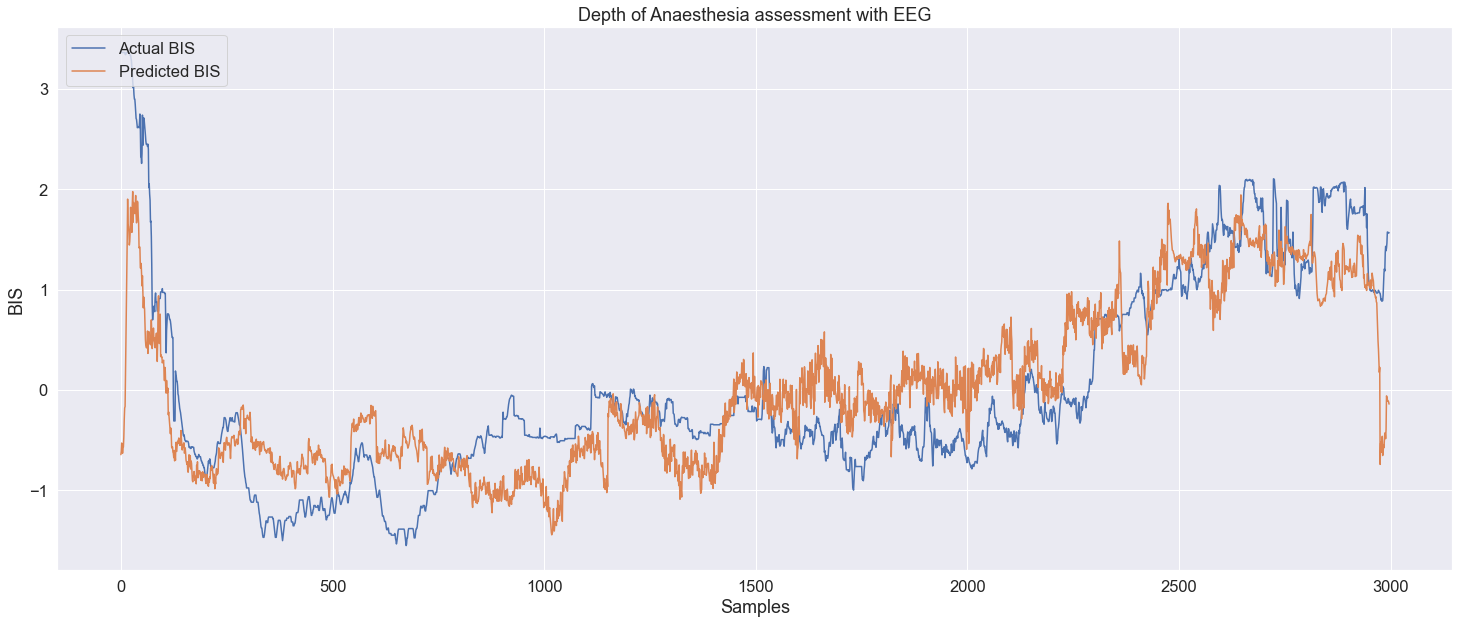

Patient: 4_EEG200909160908.mat



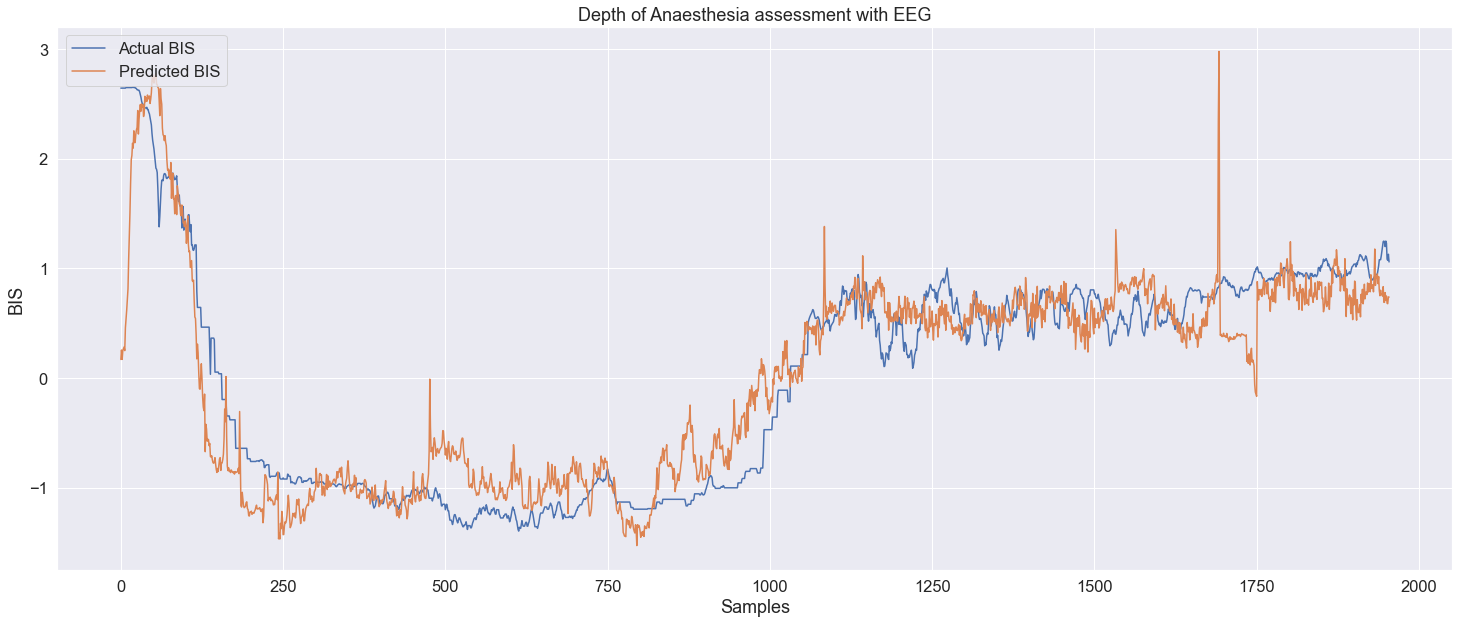

Patient: 13_EEG20100609.mat



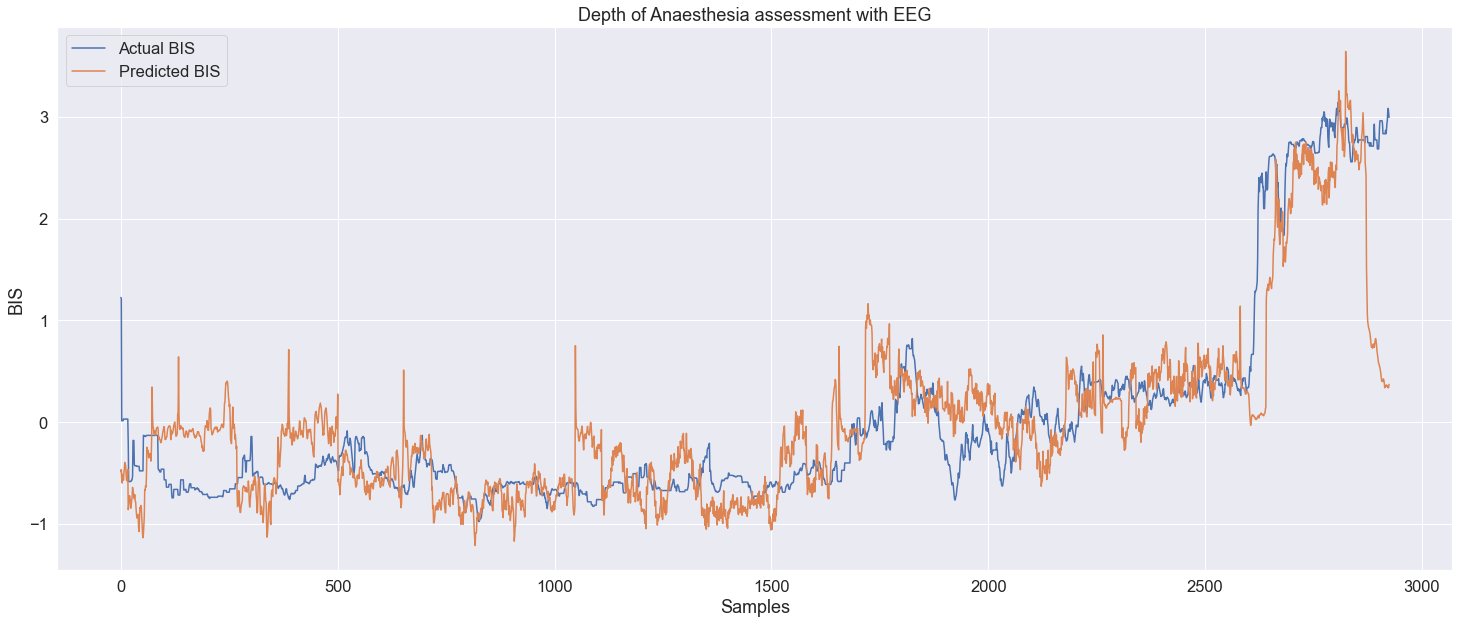

Patient: 19_EEG201004072.mat



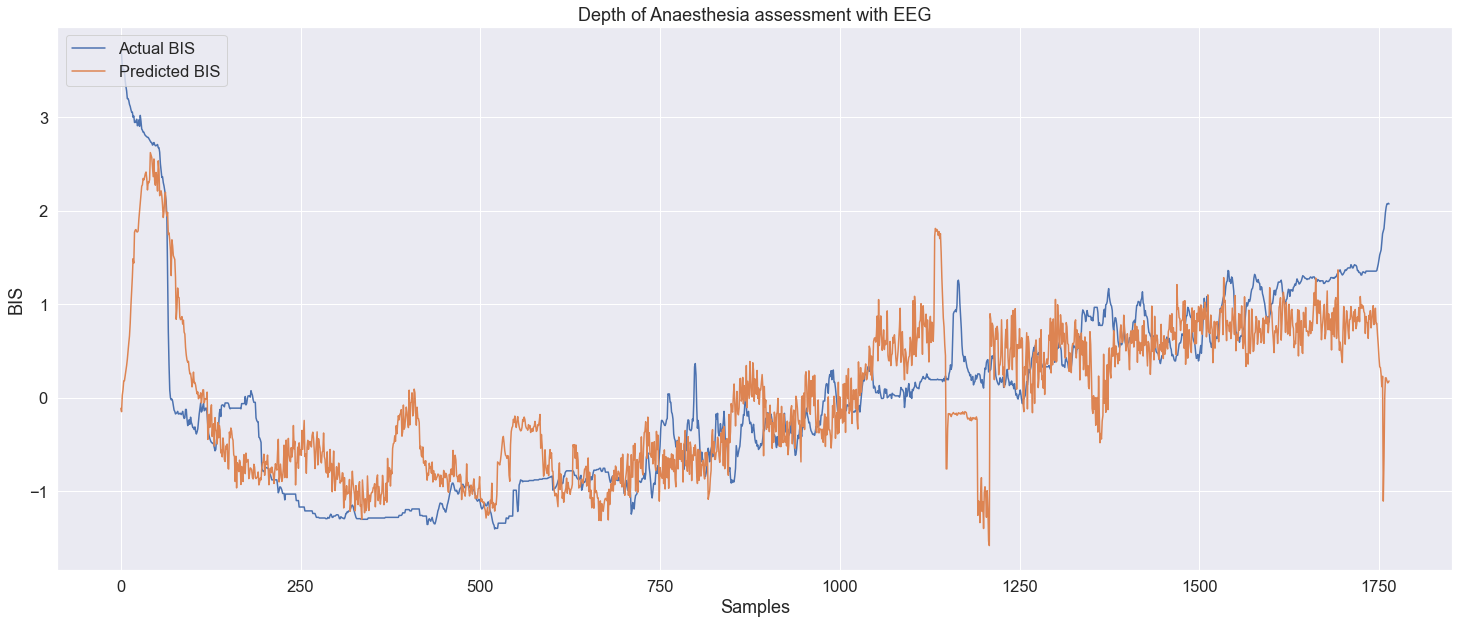

Patient: 30_EEG200909091.mat



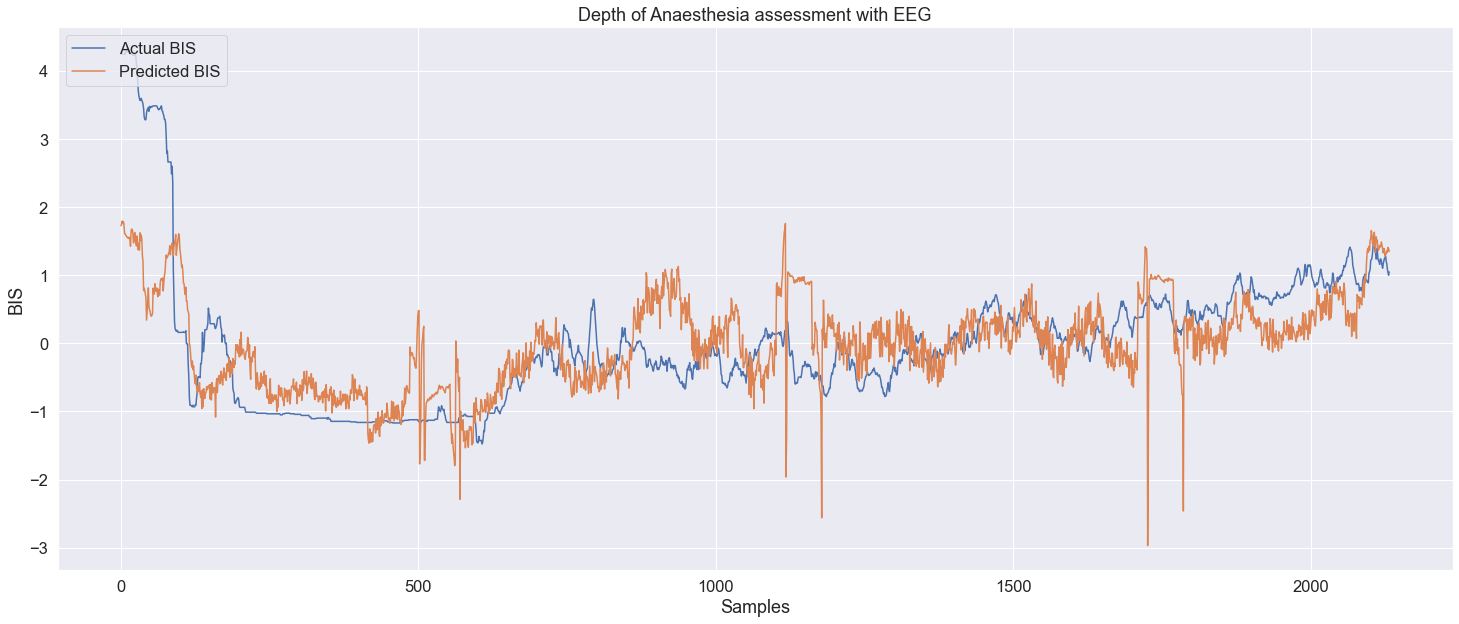

Patient: 2_EEG200908190811.mat



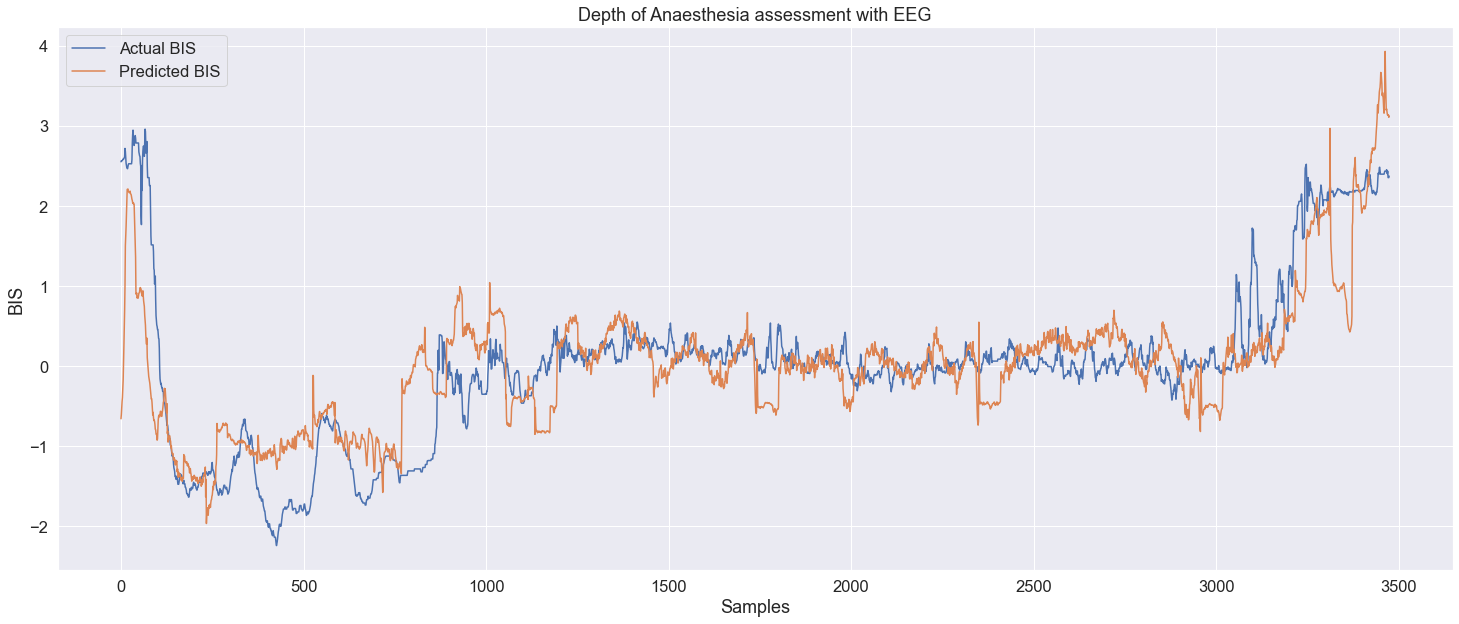

Patient: 32_EEG201004071.mat



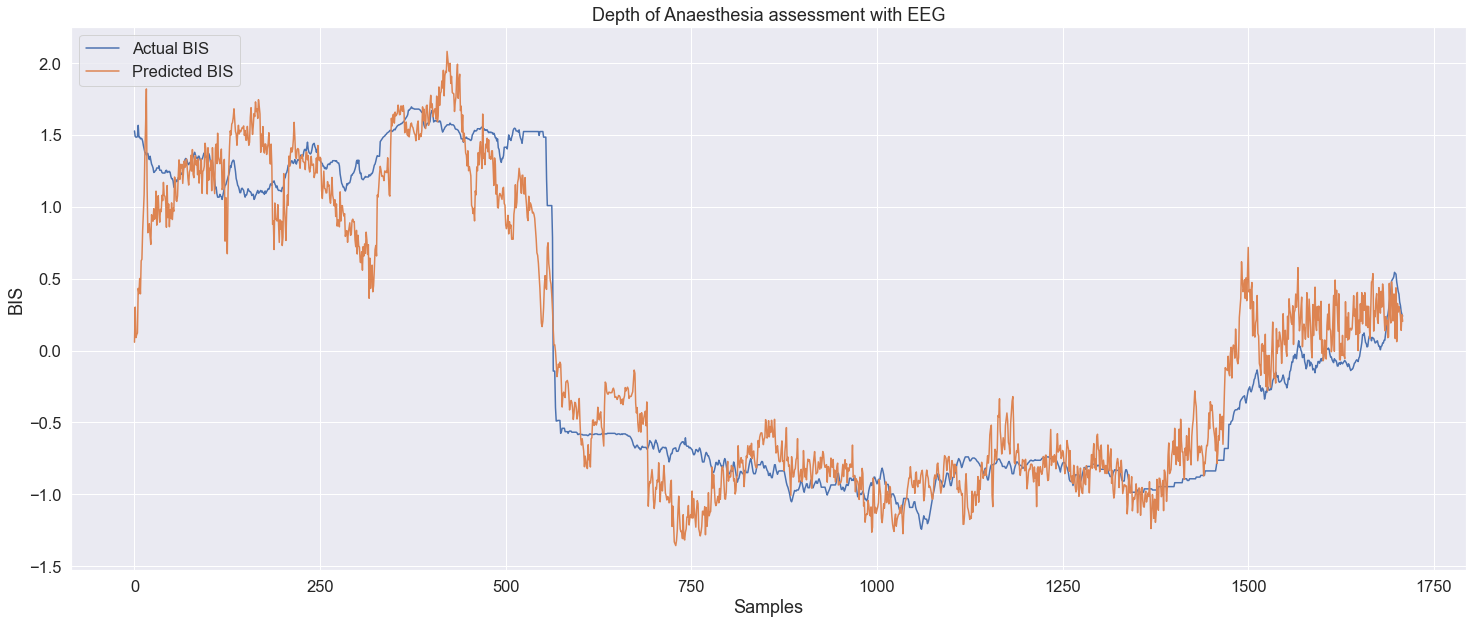

Patient: 20_EEG201005241.mat



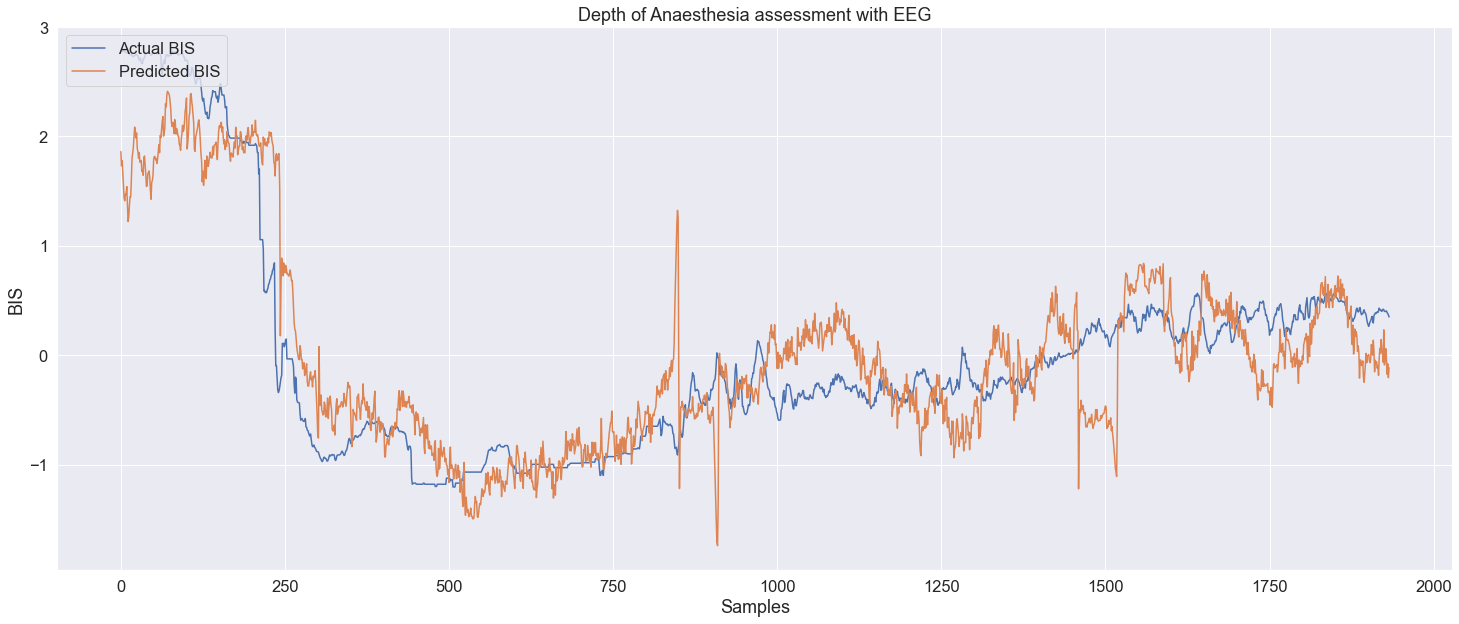

Patient: 7_EEG201005241657.mat



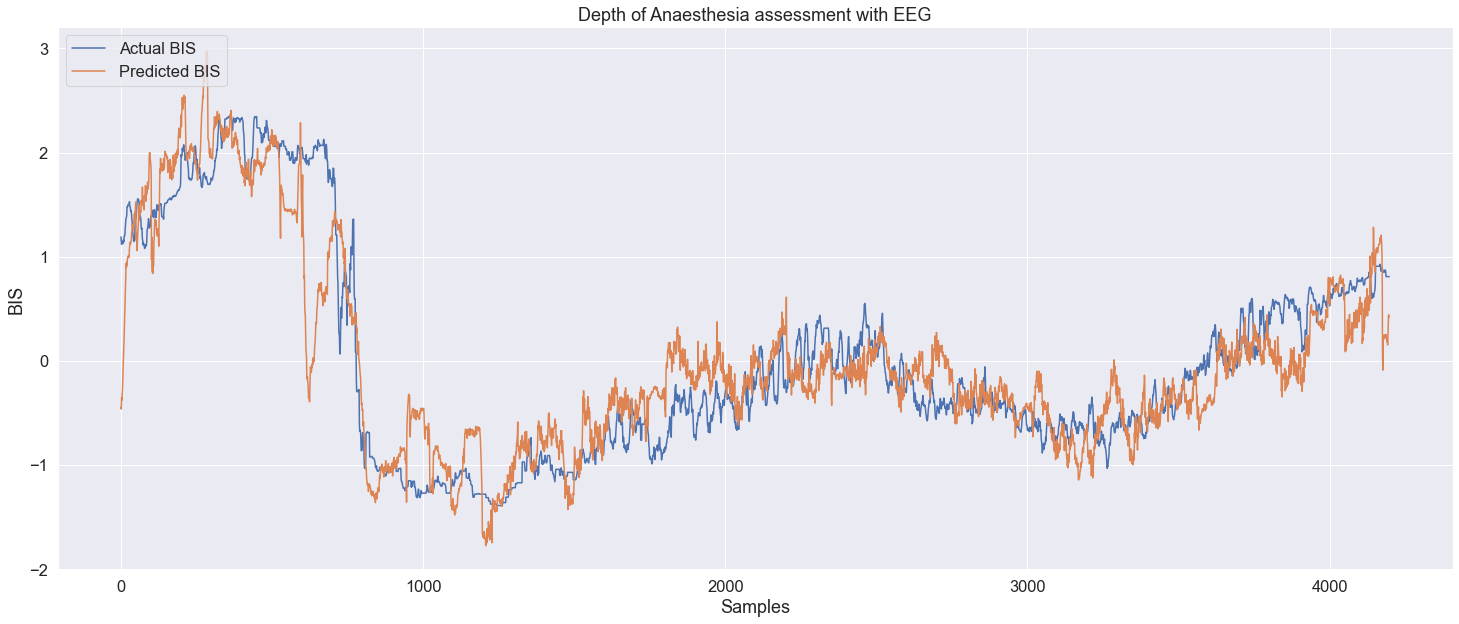

Patient: 3_EEG200908190921.mat



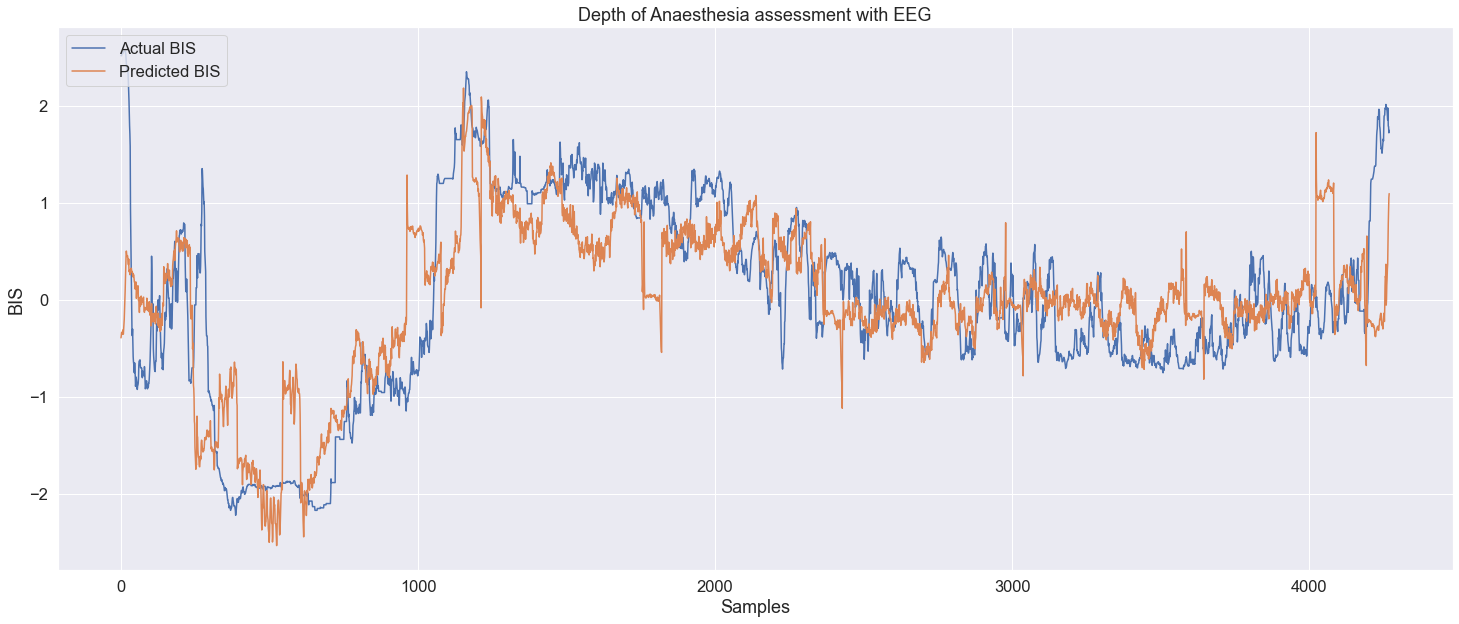

In [65]:
for train in training_set:
    patient = create_patient_data(train)
    print("Patient: {}".format(train.strip("_modified.csv")))
    print()
    build_model(patient, selected_features, model='lr')

<br/>